In [1]:
%matplotlib inline

In [66]:
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
import pandas as pd
import random
random.seed(42) # Sets seed for reproducibility
import math
import scipy.stats
import sympy
# Write yor imports here

# Monte Carlo Simulation - a brief overview

### Autor: Krum Arnaudov for Math Concepts for Developers - april 2018

# Abstract
The purpose of this study is to serve as introduction to the topic of Monte Carlo Simulations. I first brief the basic probability theory needed, start with a typical example from games of chance, move to the famous Buffon's needle and end with numerical integration. Wherever possible, I tried to add to the code universe online. I was not able to find a code that follows the Buffon's needle example end-to-end (instead much of the code focused on the circle-insribed-in-square subcase). The one suggested by me does follow the original Buffon question. Similarly, the Monte Carlo numerical integration code available was either complex or did not produce correct results for function intervals where $f(x)<0$. I wrote a version that considers a 2d function in all intervals. The study can be useful as an entry point into the Monte Carlo topic. I do plan to follow it up with a study of high-dimentional space usage of the method and more complex business examples.

## 1. Introduction

    "You want to be careful with these. When they say every flavour, they mean every flavour - you know you get all the      ordinary ones like chocolate and peppermint and marmalade, but then you can get spinach and liver and tripe.             George reckons he had a bogey-flavoured one once."
                —Ron Weasley to Harry Potter, introducing Harry to Probability theory


Probability theory is useful in many contexts and areas that depend on data affected by chance in some way. From games of chance and sports to science and finally, as the above warning Ron gives to Harry - magical cuisine, thinking in terms of probability gives one an edge. 

To this end, I will start with some basic definitions and principles.
- An ***experiment*** or ***trial*** is an action with an uncertain outcome, such as throwing a fair dice.
- A ***sample space*** is the set of all possible outcomes of an experiment. With a fair dice, we get 6 possible outcomes (numbers of 1-6).
- A ***sample point*** is a single possible outcome - for example, *6*
- An ***event*** is a specific outome of single instance of an experiment - for example, tossing a coin and getting *6*.
- ***Probability*** is a value between 0 and 1 that indicates the likelihood of a particular event, with 0 meaning that the event is impossible, and 1 meaning that the event is inevitable. In general terms, it's calculated like this:

\begin{equation}\text{probability of an event} = \frac{\text{Number of sample points that produce the event}}{\text{Total number of sample points in the sample space}} \end{equation}

In games of chance, probability usually has a very intuitive definition. For instance, we know that the chance of a dice coming up four is 1 in 6. However, this is not always that easy in other contexts. Answering questions about probability is often hard, if not impossible. Harry does not know the sample space of the Bertie Bott's Every Flavour Beans (every flavour of every single bean existing) and it would be very difficult for him to estimate the probability of picking a certain flavour. Most of the early work on probability theory resolved around clever men facing problems considered hard for their time and one particular area - games of chance or gambling.

## 2. Pascal's problem - Central Limit Theorem and Law of large numbers

The story says that Blaise Pascal's interest in the field of probability began when a friend asked him whether or not it would be profitable to bet that within twenty-four rolls of a pair of dice he would roll a double six. Pascal and another brilliant mind of the time - Pierre de Fermat, exchanged a number of letters about how to resolve the
issue, which now seems like an easy question to answer:
- On the first roll the probability of rolling a six on each die is 1/6, so the probability of rolling a six with both dice is 1/36.
- Therefore, the probability of not rolling a double six on the first roll is 1 - 1/36 = 35/36.
- Therefore the probability of not rolling a double six twenty-four consecutive times is (35/36)<sup>24</sup>, nearly 0.51, and therefore the probability of rolling a double six is 1 - (35/36)<sup>24</sup>, about 0.491. In the long run it would not be profitable to bet on rolling a double six within twenty-four rolls.

Even if we are not fluent in probability theory, computers provide a way to perform an experiment and play Pascal's friend's game. Random number generators permit us to mimic the process of picking at random.

The below code produces one random outcome, performing the experiment of throwing one fair dice once:

In [3]:
print("Throwing one dice and the result is: " + str(random.choice([1,2,3,4,5,6])))

Throwing one dice and the result is: 6


As Pascal's friend was interested in the long-term profitability of the game, a code can be written to repeat the experiment "over and over":

In [4]:
def rollDie():
    return random.choice([1,2,3,4,5,6])
def checkPascal(numTrials):
    """Assumes numTrials an int > 0
    Takes number of trials as input and prints an estimate of the probability of winning
    """
    numWins = 0.0
    for i in range(numTrials):
        for j in range(24):
            d1 = rollDie()
            d2 = rollDie()
            if d1 == 6 and d2 == 6:
                numWins += 1
                break
    return numWins/numTrials

In [5]:
print("Probability of winning =", checkPascal(1000000)) #Plays the game one million times

Probability of winning = 0.491401


When run the first time, the simulation pf playing the same two-dice game one million times until we either get a pair of sixes or reach 24 throws, returned Probability of winning = 0.491401. This is indeed quite close to the result that the theoretical solution returned - 0.49140387613090342. In the (very) long run, betting on the pair is not profitable. 

The above simulation is an example of a *Monte Carlo* method. Even though the precise methods vary, the main idea is the following:

1. Define a domain of possible inputs
2. Generate inputs randomly from a probability distribution over the domain
3. Perform a deterministic computation on the inputs
4. Aggregate the results

One of the reasons why Monte Carlo simulations work is the **Central Limit Theorem (CLT)**. CLT tells us that when the number of draws, also called the sample size, is large, the probability distribution of the sum of the independent draws is approximately normal. In order to visualize the CLT, I run the following code:

In [6]:
#Run 1000 MC simulations with 1000 experiments in each
estimates_for_hist = np.zeros(1000) #creating an emply numpy array
for i in range(1000):
    estimates_for_hist[i] = checkPascal(1000) 


In [8]:
print("The mean of the 1000 experiments is: " + str(np.round(np.mean(estimates_for_hist), 6)))
print("The standard deviation of the 1000 experiments is: " + str(np.round(np.std(estimates_for_hist), 6)))

The mean of the 1000 experiments is: 0.491258
The standard deviation of the 1000 experiments is: 0.015935


The average of the 1000 Monte Carlo simulations with 1000 experiments in each is very close to the result that we received with 1000000 experiments, despite the fact, that each and every run with 1000 experiments might not be close to the mean.

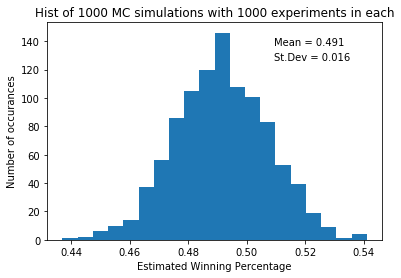

In [15]:
plt.hist(estimates_for_hist, bins = 20)
plt.title("Hist of 1000 MC simulations with 1000 experiments in each")
plt.ylabel("Number of occurances")
plt.xlabel("Estimated Winning Percentage")
plt.figtext(0.65, 0.8, r'Mean = 0.491', fontsize=10)
plt.figtext(0.65, 0.75, r'St.Dev = 0.016', fontsize=10)
plt.show()

Note that while the results of the individual experiments span from 0.44 to 0.54, the mean of the estimates is almost precisely matching the analytical result.

In the first simulation run, I used 10 000 000 Monte Carlo experiments to estimate the probability of winning. But for some calculations, 10 000 000 experiments might not be computationally feasible. Also, in more complex calculations, 10 000 000 may not nearly be. In practice, we won’t know what the answer is so we won’t know if our Monte Carlo estimate is accurate. We know that the larger the number of experiments, the better the approximation. But how big do we need it to be?

One practical approach is to check for the stability of the estimate. To do so, I first produce a sequence of 50 numbers from 10 to 10 000. That will be B = number of experiments per Monte Carlo simulation. Then I run 5 MC simulations per element of the sequence and collect the mean and standard deviation.

In [20]:
B = np.round(10**np.linspace(1, 5, 50)) #creates a sequence of 50 numbers from 10^1 to 10^5
B = B.astype(int)
estimates = np.zeros(50) #creates a numpy array to store the mean
sDevs = np.zeros(50) #creates a numpy array to store the st.dev.
ind = 0
for i in B:
    result = []
    
    for j in range(5): #computes the winning estimation 5 times for i number of experiments
        result.append(checkPascal(i))
        
    estimates[ind] = np.mean(result) # returns the mean of the results with i number of experiments 
    sDevs[ind] = np.std(result)
    ind += 1
    result = []

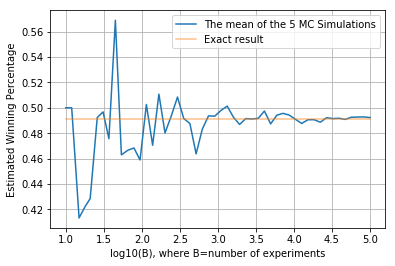

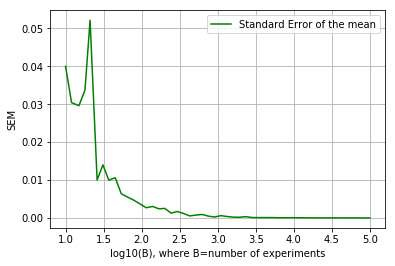

In [28]:
plt.plot(np.log10(B), estimates, label = "The mean of the 5 MC Simulations")
plt.plot(np.log10(B), [0.491403]*50, alpha = 0.5, label = "Exact result")
plt.legend()
plt.xlabel("log10(B), where B=number of experiments")
plt.ylabel("Estimated Winning Percentage")
plt.grid()
plt.show()

plt.plot(np.log10(B), sDevs/np.sqrt(B), label = "Standard Error of the mean", color = "green")
plt.legend()
plt.xlabel("log10(B), where B=number of experiments")
plt.ylabel("SEM")
plt.grid()
plt.show()

The above plot visualizes the **law of large numbers** - the standard error of the average becomes smaller and smaller as the number of experiments grows larger. When this number is very large, then the standard error is practically 0 and the average of the experiments converges to the analytical average.

## 3. Buffon's needle - Monte Carlo and geometric probability 

Pascal's Problem is an example of a use of the Monte Carlo method for **stochastic simulation** (such simulation that incorporates randomness in a model). About one century later, again in France, two different, but equally brilliant gentlemen - Georges-Louis Leclerc, Comte de Buffon and Pierre-Simon Laplace, pondered upon another stochastic question. While their work was valuable in and of itself, their setup was made popular by one remarkable property of their results - the ability to estimate the value of $\pi$.

Buffon asked the following question: <br />

    Suppose we have a floor made of parallel strips of wood, each the same width, and we drop a needle onto the floor.       
    What is the probability that the needle will lie across a line between two strips?

A detailed solution can be found [here](http://web.mit.edu/urban_or_book/www/book/chapter3/3.3.1.html). In brief, the probability that a needle with length $l$ will cross a line, where $d$ is the distance between lines, depends on:
1. the distance $y$ from the center of the needle to the closest of the equidistant parallel lines and 
2. $\theta$ = angle of the needle, measured with respect to the parallel lines

Under the assumptions that both 1) and 2) are uniformally distributed and independent (there is no reason to assume that knowing the needle's angle would affect one's knowledge about its center position or conversely), the joint probability dencity function is the product with end-result, that intersection occurs for all points in the (Y, $\theta$ ) sample space satisfying the inequality $y \leq \frac{1}{2}sin\theta $. Integrating over this set, we obtain the desired probability: $$ P=\int_{\pi}^{0}d\theta \int_{0}^{\frac{1}{2}sin\theta}dy \frac{2}{\pi d}=\frac{1}{\pi d} \int_{0}^{\pi}d\theta sin\theta = \frac{2l}{\pi d}$$

Not surprisingly, the probability of a needle crossing one of the parallel lines depends positively on its length $l$ and negatively on $d$ - the distance between lines. The surprise here is what is $\pi$, a fundamental constant of nature, doing in the denominator? Can one really estimate $\pi$ by randomly, independantly throwing needles at a lined board?

In 1901, Italian mathematician Mario Lazzarini performed Buffon's needle experiment. Tossing a needle 3408 times, he obtained the well-known approximation 355/113 for $\pi$, accurate to six significant digits. The estimation is so close to $\pi$, that the scientific community challenged the outcome. Fortunately, computers and Monte Carlo methods allow us to perform the simulation without confirmation bias.

The below simulation follows the logic of Guttag, J.V. (2016) p. 203, but rather than simulating darts thrown at a unit circle, inscribed into a square, I adapted the code to match the original Buffon question in the case of needles shorter than the distance between lines. Buffon and Laplace never really discussed the circle in square version of the problem.


In [67]:
def throwNeedles(num_needles, needle_length, line_width):
    """
    Takes number of needles as input and simulates dropping the needle. This is the actual MC simulation.
    """
    observations = np.zeros(num_needles)
    for Needles in range(num_needles):
        y = np.random.uniform(0, line_width/2) # gets a random and uniformly distributed positive distance from the center of the needle to a line
        theta = np.random.uniform(0, np.pi/2) # ges a random and uniformly distributed angle 
        
        if y < (needle_length/2)*np.sin(theta): 
            observations[Needles] = True
        else:
            observations[Needles] = False
    return observations

In [68]:
def getEst(num_needles, num_trials, line_width, needle_length):
    """
    Takes number of needles and number of trials as inputs and returns the mean of the current Pi estimate and the standard deviation
    """
    estimates = np.zeros(num_trials)
    for t in range(num_trials):
        piGuess = (2*needle_length*num_needles)/(line_width*np.sum(throwNeedles(num_needles, needle_length, line_width)))
        estimates[t] = piGuess
    sDev = np.std(estimates)
    curEst = np.mean(estimates)
    print ("Est = " + str(round(curEst, 5)) + ", Std. dev = " + str(round(sDev,5)) + ", Needles = " + str(num_needles))
    return (curEst, sDev)

In [69]:
def estPi(precision, num_trials, line_width, needle_length):
    """
    Takes precision, number of trials, line width and needle length as inputs.
    Starting from 1000 Needles, returns Pi estimate until the Standard deviation of the estimates reaches precision/2
    """
    num_needles = 1000
    sDev = precision
    while sDev >= precision/2.0:
        curEst, sDev = getEst(num_needles, num_trials, line_width, needle_length)
        num_needles *=2
    return curEst

In [70]:
estPi(0.01, 10, 3, 2.5) # precision = 0.01, num_trials starts from 10, line_width = 3, needle_length - 2.5

Est = 3.13188, Std. dev = 0.06677, Needles = 1000
Est = 3.12812, Std. dev = 0.07417, Needles = 2000
Est = 3.14128, Std. dev = 0.04931, Needles = 4000
Est = 3.14411, Std. dev = 0.03292, Needles = 8000
Est = 3.13296, Std. dev = 0.01305, Needles = 16000
Est = 3.14155, Std. dev = 0.02219, Needles = 32000
Est = 3.14018, Std. dev = 0.01105, Needles = 64000
Est = 3.14383, Std. dev = 0.0095, Needles = 128000
Est = 3.14114, Std. dev = 0.00567, Needles = 256000
Est = 3.14124, Std. dev = 0.00349, Needles = 512000


3.1412372813606657

Running estPi(0.01, 10, 3, 2.5) it printed:

    Est = 3.13188, Std. dev = 0.06677, Needles = 1000
    Est = 3.12812, Std. dev = 0.07417, Needles = 2000
    Est = 3.14128, Std. dev = 0.04931, Needles = 4000
    Est = 3.14411, Std. dev = 0.03292, Needles = 8000
    Est = 3.13296, Std. dev = 0.01305, Needles = 16000
    Est = 3.14155, Std. dev = 0.02219, Needles = 32000
    Est = 3.14018, Std. dev = 0.01105, Needles = 64000
    Est = 3.14383, Std. dev = 0.0095, Needles = 128000
    Est = 3.14114, Std. dev = 0.00567, Needles = 256000
    Est = 3.14124, Std. dev = 0.00349, Needles = 512000

The standard deviation decreased not as monotonically as expected, starting from a rather small value for 1000, but still decreasing as coded to 0.00349 for 512000 needles. Curiously, the best estimate of $\pi$ was produced with only 32000 needles and the estimate with 4000 needles was actually closer to $\pi$, than the end result. However, if we look at the ranges defined by one standard deviation around each of the means, the 3 ranges contain the true value of $\pi$, and the range associated with the larger sample size is considerably smaller. Even though the estimate
generated with 512,000 samples happens to be further from the actual value of $\pi$, we should have more confidence in its accuracy. 

Interestingly, even my best guess with 512000 needles is far from being as accurate as Lazzarini's one with only 3408 needles. Perhaps his experiment was *less random* than mine.

## 4. Monte Carlo and numerical integration

The above example is similar to a a group of Monte Carlo techniques that use the MC method to compute a definite integral (the area "between" the function we're integrating, and the x-axis). The method is particularly usefull for integrals, for which analytical solution is difficult. 
In 2D-space, the Monte Carlo integration method is relatively straight-forward:
1. Define the sample space between upper and lower integral limits and the function minimum and maximum for the interval
2. Randomly select $N$ number of points within the sample space
3. Estimate the mean of the random variable - $\frac{p}{N}$, where $p$ is the number of points "between" the function we're integrating, and the x-axis
4. Integral = sampled space × mean

In order to test the MC numerical integration, it will be compared against the trapezoid method on an integral, known from our labs and one that can't be solved analytically:
$$\int\sin(x^2)dx$$

I will define 3 functions:
1. **Integrate** - a function using Python library ready-made functions. I will use the results to compare the MC and trapezoid functions 
2. **MC_integrate** - a MC numerical integrator. Unlike several versions available online, I tried my best to account for negative values of $f(x)$.
3. **Trapezoid_integrate** - a function, using the definition for integral

Below is the code for all 3:

In [71]:
def Integrate (function, x_min, x_max):
    """
    Takes a function, lower and upper limits as inputs.
    Uses ready-made Python packages to compute the integral.
    """
    x = sympy.Symbol('x')
    d1 = sympy.integrate(function(x))
    sol = d1.subs(x, x_max) - d1.subs(x, x_min)
    
    return float(sol)

In [72]:
def MC_integrate(function, x_min, x_max, num_points):
    """
    Takes a function, lower and upper limits and a number of points as inputs.
    Uses a Monte Carlo numerical integration method to estimate the integral.
    """
    X = np.linspace(x_min,x_max, 1000)
    area = 0
    minus_area = 0

    for i in range(num_points):
        x = np.random.uniform(x_min,x_max)
        y = np.random.uniform(min(function(X)), max(function(X))) # accounting for negative values of f(x)
        space = (x_max - x_min)*(np.max(function(X))-np.min(function(X)))
        
        if function(x) > 0:
            if function(x) > y and y > 0: # accounting for negative values of f(x)
                area += 1
    
        else:
            if function(x) < y and y < 0: # accounting for negative values of f(x)
                minus_area += 1
    Pos_area = (area/num_points)*space
    Neg_area = (minus_area/num_points)*space
    return Pos_area - Neg_area

In [73]:
def Trapezoid_integrate (function, x_min, x_max, num_points):
    """
    Calculates a numerical approximation of the definite integral of the provided function
    between the points x_min and x_max.
    The parameter num_points specifies the number of points at which the integral will be calculated
    """
    x = np.linspace(x_min, x_max, num_points)
    h = x[2] - x[1]
    area = 0
    for i in range(1, num_points):
        area += ((function(x[i-1])+function(x[i]))/2)*h
    return area

Once defined, let us test the 2 estimation functions against the result of the Python library one.

In [74]:
print("The integral is equal to: " + str(Integrate(lambda x: sympy.sin(x ** 2), 0, 5)))

The integral is equal to: 0.5279172811653224


In [79]:
print("Using the trapezoid method, the estimation is: " + str(Trapezoid_integrate(lambda x: np.sin(x ** 2), 0, 5, 40000)))

Using the trapezoid method, the estimation is: 0.5279172940722562


In [83]:
print("Using MC, the estimation is: " + str(MC_integrate(lambda x: np.sin(x ** 2), 0, 5, 400000)))

Using MC, the estimation is: 0.5239699850706434


The Trapezoid method function returns an exact result to the 8th decimal point, while the MC method is off slightly, but using the same number of points. No timer was needed to determine, that the MC method is also substaintially slower than the Trapezoid one, even for the same or lower number of points. The trapezoid one uses points from a predefined list, while for MC we need to run through the random number generator each time. In addition, geometrically, we need to fill a **line** with points for the trapezoid method, while we need to do the same with **space** for MC.
Those results are expected and should not serve as a sentance for the MC integration. Its virtue is mainly in highly complex, high-dimentional spaces, for which using the deterministic numerical integration proves to be significantly slower.

## 5. Conclusion
This study is an introduction to the Monte Carlo Method topics and as such, leaves a lot of ground uncovered. For examples, it does not touch any finance topic (unless we count Pascal's problem as one) where Monte Carlo is a main tool in the box or currently popular topics like Monte Carlo tree search in AI gaming. I intend to follow up this study with at least one on Monte Carlo and non-finance business topics.

## References

1) J.V. Guttag, Introduction to Computation and Programming in Python, with Application to Understanding Data, MIT Press (2016), chapter 14 - Monte Carlo Simulation <br />
2) https://en.wikipedia.org/wiki/Monte_Carlo_method <br />
3) R. A. Irizarry, Introduction to Data Science, Chapters Probability and Inference and Modeling https://rafalab.github.io/dsbook/ <br />
4) MIT Free CourseWare - Introduction to Computational Thinking and Data Science, https://ocw.mit.edu/courses/electrical-engineering-and-computer-science/6-0002-introduction-to-computational-thinking-and-data-science-fall-2016/index.htm <br />
5) https://www.mathsisfun.com/data/probability.html <br />
6) EdX course offered by Microsoft - Essential Mathematics for Artificial Inteligence, chapter "Statistics and Probability" - https://courses.edx.org/courses/course-v1:Microsoft+DAT256x+1T2018/course/ <br />
7) http://harrypotter.wikia.com/wiki/Bertie_Bott%27s_Every_Flavour_Beans <br />
8) Weisstein, Eric W. "Buffon-Laplace Needle Problem." From MathWorld--A Wolfram Web Resource. http://mathworld.wolfram.com/Buffon-LaplaceNeedleProblem.html <br />
9) Buffon's Needle Experiment, Wikipedia https://en.wikipedia.org/wiki/Buffon%27s_needle#Case_2:_Long_needle <br />
10) Buffon's Needle Experiment, MIT http://web.mit.edu/urban_or_book/www/book/chapter3/3.3.1.html <br />
11) https://en.wikipedia.org/wiki/Unit_circle <br />
12) http://pythonfiddle.com/buffons-needle-experiment/ <br />
13) Quant Education, Monte Carlo Simulation and Integration https://www.youtube.com/watch?v=aNnP5hFTd-I <br />